# 非线性模拟数据回归 

In [1]:
# %% 引入依赖项
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# %% 检查 Tensorflow 版本
tf.__version__

'2.3.0'

In [3]:
# %% 生成数据
train_samples, test_samples = 200, 60
dsX = np.linspace(-1, 1, train_samples + test_samples).transpose()
dsY = 0.4 * pow(dsX, 2) + 2 * dsX + 0.8

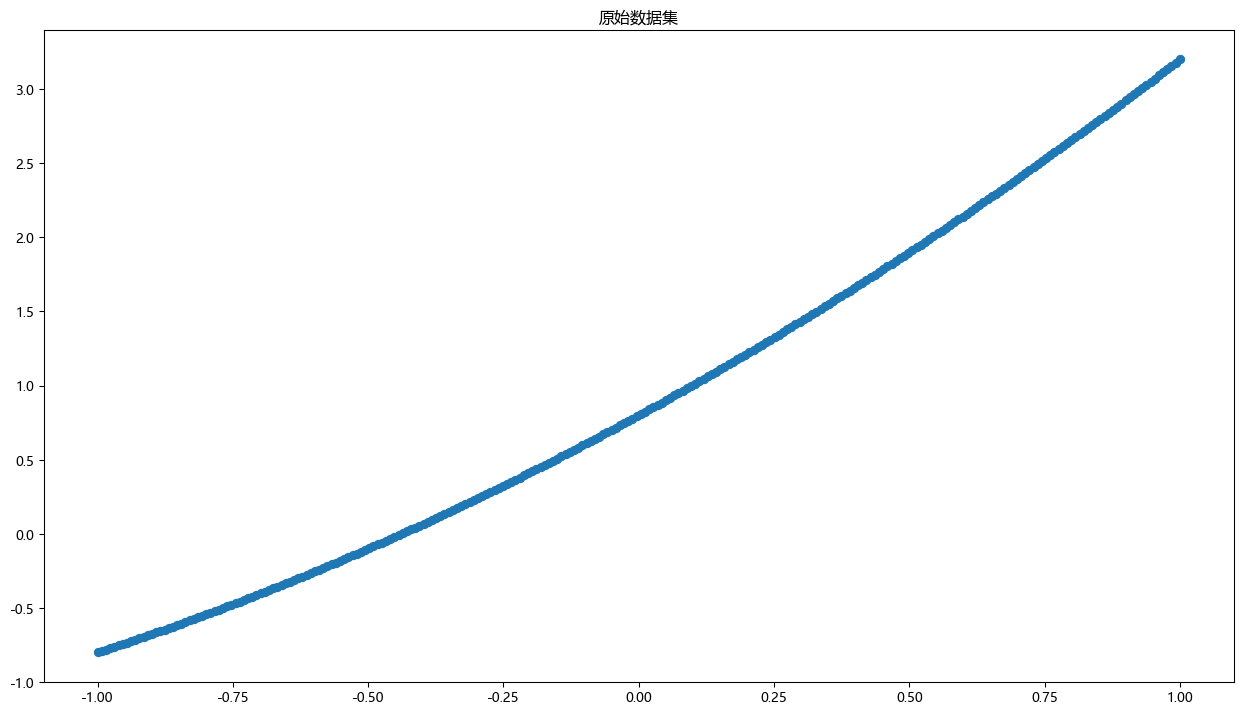

In [4]:
# %% 绘制图像
plt.figure(figsize=(16, 9), dpi=96)
plt.title('原始数据集')
plt.scatter(dsX, dsY)

In [5]:
# %% 构造自定义层
class LinearLayer(tf.keras.layers.Layer):
    """ 继承自 Keras 模型层 """
    def __init__(self, units):
        """ 函数初始化
        :param units 输出张量长度
        """
        super().__init__()
        self.units = units

    def build(self, input_shape):
        # 初始化权重值
        self.w = self.add_weight(name='w', shape=(1, self.units), initializer=tf.zeros_initializer())
        # 初始化偏置值
        self.b = self.add_weight(name='b', shape=(self.units), initializer=tf.zeros_initializer())

    def call(self, inputs):
        return tf.nn.sigmoid(inputs * self.w + self.b)

In [6]:
# %% 构建自定义模型
class LinearModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.layer = LinearLayer(units=1)

    def call(self, inputs):
        return self.layer(inputs)

In [7]:
# %% 训练模型
# 默认浮点精度
tf.keras.backend.set_floatx('float64')
model = LinearModel()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
for i in range(1, 21):
    train_X, train_Y = dsX[:train_samples], dsY[:train_samples]
    with tf.GradientTape() as tape:
        y_pred = model(train_X)
        # 均方误差
        loss = tf.reduce_mean(tf.square(y_pred - train_Y))
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
    test_X, test_Y = dsX[train_samples:train_samples + test_samples], dsY[train_samples:train_samples + test_samples]
    y_pred_test = model(test_X)
    loss_test = tf.reduce_mean(tf.square(y_pred_test - test_Y))
    print(f'第{i}轮训练的平均损失：{loss_test.numpy() / test_samples}')
    dsX, dsY = shuffle(dsX, dsY)

第1轮训练的平均损失：0.07485030651282346
第2轮训练的平均损失：0.021217637810281364
第3轮训练的平均损失：0.02466506896636045
第4轮训练的平均损失：0.02321071759587274
第5轮训练的平均损失：0.025820355239982072
第6轮训练的平均损失：0.023989336530302906
第7轮训练的平均损失：0.021822409142000582
第8轮训练的平均损失：0.021937236930352606
第9轮训练的平均损失：0.02217615051015776
第10轮训练的平均损失：0.02507748314938938
第11轮训练的平均损失：0.019403545126222558
第12轮训练的平均损失：0.03021724432076118
第13轮训练的平均损失：0.026857907341967916
第14轮训练的平均损失：0.02657003666056756
第15轮训练的平均损失：0.030751670235704194
第16轮训练的平均损失：0.029438436037530095
第17轮训练的平均损失：0.020802482098022646
第18轮训练的平均损失：0.02623524665905561
第19轮训练的平均损失：0.025178470601707532
第20轮训练的平均损失：0.0230982311343732


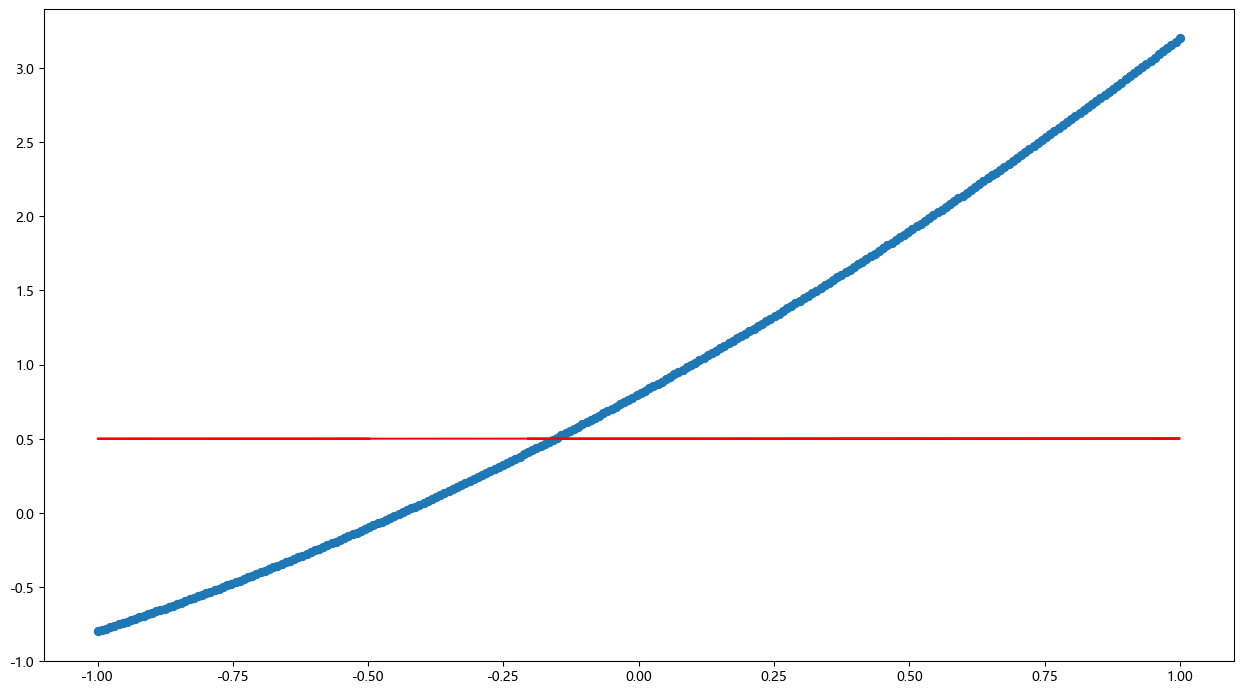

In [9]:
# %% 可视化拟合效果
plt.figure(figsize=(16, 9), dpi=96)
plt.scatter(dsX, dsY)
plt.plot(dsX, model(dsX).numpy().T, 'red')